In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder


In [2]:
with open('./data/training_attack_types', 'r') as f:
    attack_types = f.read()
    
types = dict()
types['normal'] = 'normal'
for line in attack_types.split("\n"):
    if line:
        attack, description = line.split(" ", 1)
        types[attack] = description


In [3]:
columns = pd.read_csv('./data/kddcup.names',header=None)
if columns[0][0] == 'back':
    columns = columns.drop(columns.index[0])
    columns.reset_index(drop=True, inplace=True)
columns = columns.dropna(axis=1)
columns[[0,1]] = columns[0].str.split(':',expand = True)
names = columns[0].tolist()
names.append('label')

In [4]:
df = pd.read_csv('./data/kddcup.data_10_percent',header=None)
df.columns = names
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df['attack_type'] = df['label'].apply(lambda x: types[x[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [6]:
attack_counts = df['attack_type'].value_counts()
attack_counts

attack_type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

In [7]:
label_count = df.label.value_counts()
label_count

label
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [8]:
print("Shape :",df.shape)
print("Number of features :",len(df.columns))
print("Number of unique services :",df.service.nunique())
print("Number of labels :",len(df['label'].unique()))
print("missing values :",df.isnull().sum().sum())

Shape : (494021, 43)
Number of features : 43
Number of unique services : 66
Number of labels : 23
missing values : 0


In [9]:
categorical = df.select_dtypes(include=['object']).columns
print("Categorical features :",categorical)
categorical = categorical.tolist()
print("Categorical features list:",categorical)
categorical.remove('label')
categorical.remove('attack_type')
print("Extracted categorical features list:",categorical)

Categorical features : Index(['protocol_type', 'service', 'flag', 'label', 'attack_type'], dtype='object')
Categorical features list: ['protocol_type', 'service', 'flag', 'label', 'attack_type']
Extracted categorical features list: ['protocol_type', 'service', 'flag']


In [10]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

analyze(df)


494021 rows
** duration:2495 (0%)


** protocol_type:[icmp:57.41%,tcp:38.47%,udp:4.12%]
** service:[ecr_i:56.96%,private:22.45%,http:13.01%,smtp:1.97%,other:1.46%,domain_u:1.19%,ftp_data:0.96%,eco_i:0.33%,ftp:0.16%,finger:0.14%,urp_i:0.11%,telnet:0.1%,ntp_u:0.08%,auth:0.07%,pop_3:0.04%,time:0.03%,csnet_ns:0.03%,remote_job:0.02%,gopher:0.02%,imap4:0.02%,discard:0.02%,domain:0.02%,iso_tsap:0.02%,systat:0.02%,shell:0.02%,echo:0.02%,rje:0.02%,whois:0.02%,sql_net:0.02%,printer:0.02%,nntp:0.02%,courier:0.02%,sunrpc:0.02%,netbios_ssn:0.02%,mtp:0.02%,vmnet:0.02%,uucp_path:0.02%,uucp:0.02%,klogin:0.02%,bgp:0.02%,ssh:0.02%,supdup:0.02%,nnsp:0.02%,login:0.02%,hostnames:0.02%,efs:0.02%,daytime:0.02%,link:0.02%,netbios_ns:0.02%,pop_2:0.02%,ldap:0.02%,netbios_dgm:0.02%,exec:0.02%,http_443:0.02%,kshell:0.02%,name:0.02%,ctf:0.02%,netstat:0.02%,Z39_50:0.02%,IRC:0.01%,urh_i:0.0%,X11:0.0%,tim_i:0.0%,pm_dump:0.0%,tftp_u:0.0%,red_i:0.0%]
** flag:[SF:76.6%,S0:17.61%,REJ:5.44%,RSTR:0.18%,RSTO:0.12%,SH:0.02%,S1:0.01%,S2:0.0%,RSTOS0:0.0%,S3:0.0%

In [12]:
# Removal of unwanted features here the unique values len is 1 so there are no chnage in the values for this particular feature
df['num_outbound_cmds'].value_counts()
df.drop('num_outbound_cmds', axis=1, inplace=True)
df['is_host_login'].value_counts()
df.drop('is_host_login', axis=1, inplace=True)


In [13]:
attack_vs_protocol = pd.crosstab(df.attack_type, df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack_type,,,
dos,281054,109425,979
normal,1288,76813,19177
probe,1260,2652,195
r2l,0,1126,0
u2r,0,49,3


In [14]:
import itertools
def bake_pies(data_list,labels):
    list_length = len(data_list)

    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
  
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)

    for count, data_set in enumerate(data_list): 
        
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
    
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])


        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        axs[count].set_title(labels[count])
        
    return axs   

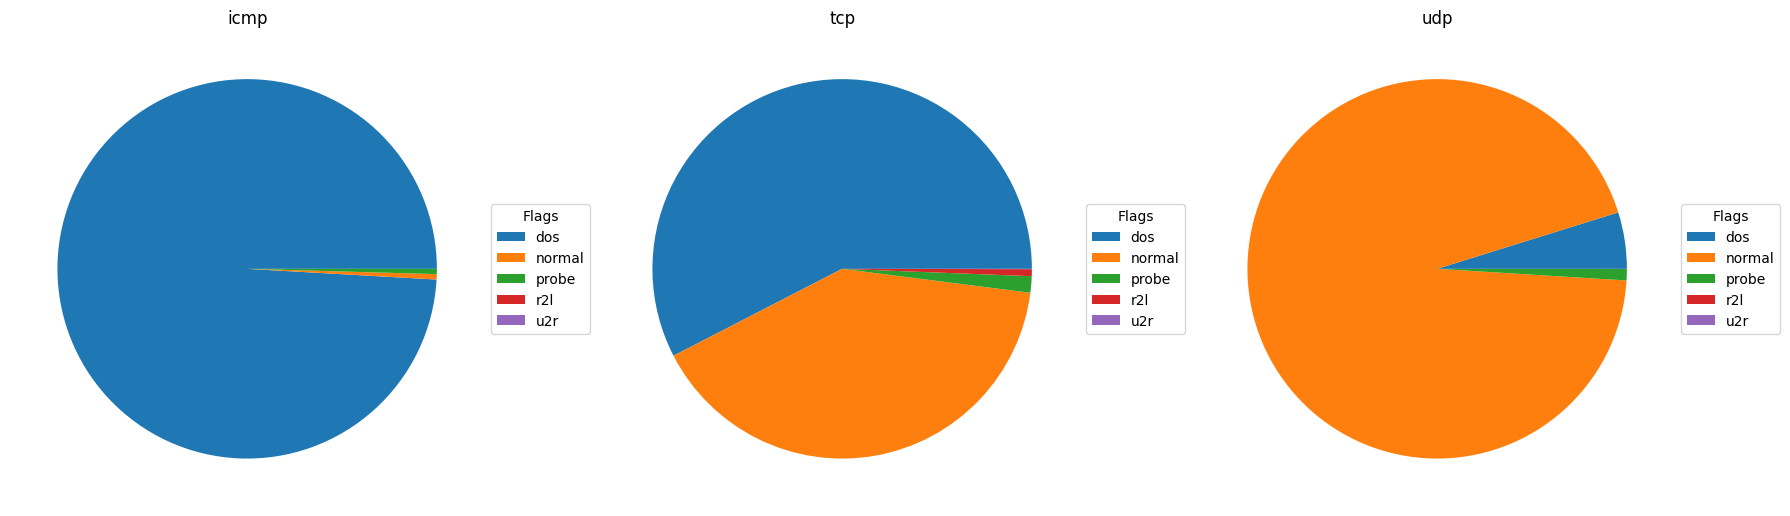

In [15]:
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

# create the charts
bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()

In [16]:
df.attack_type.unique()

array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

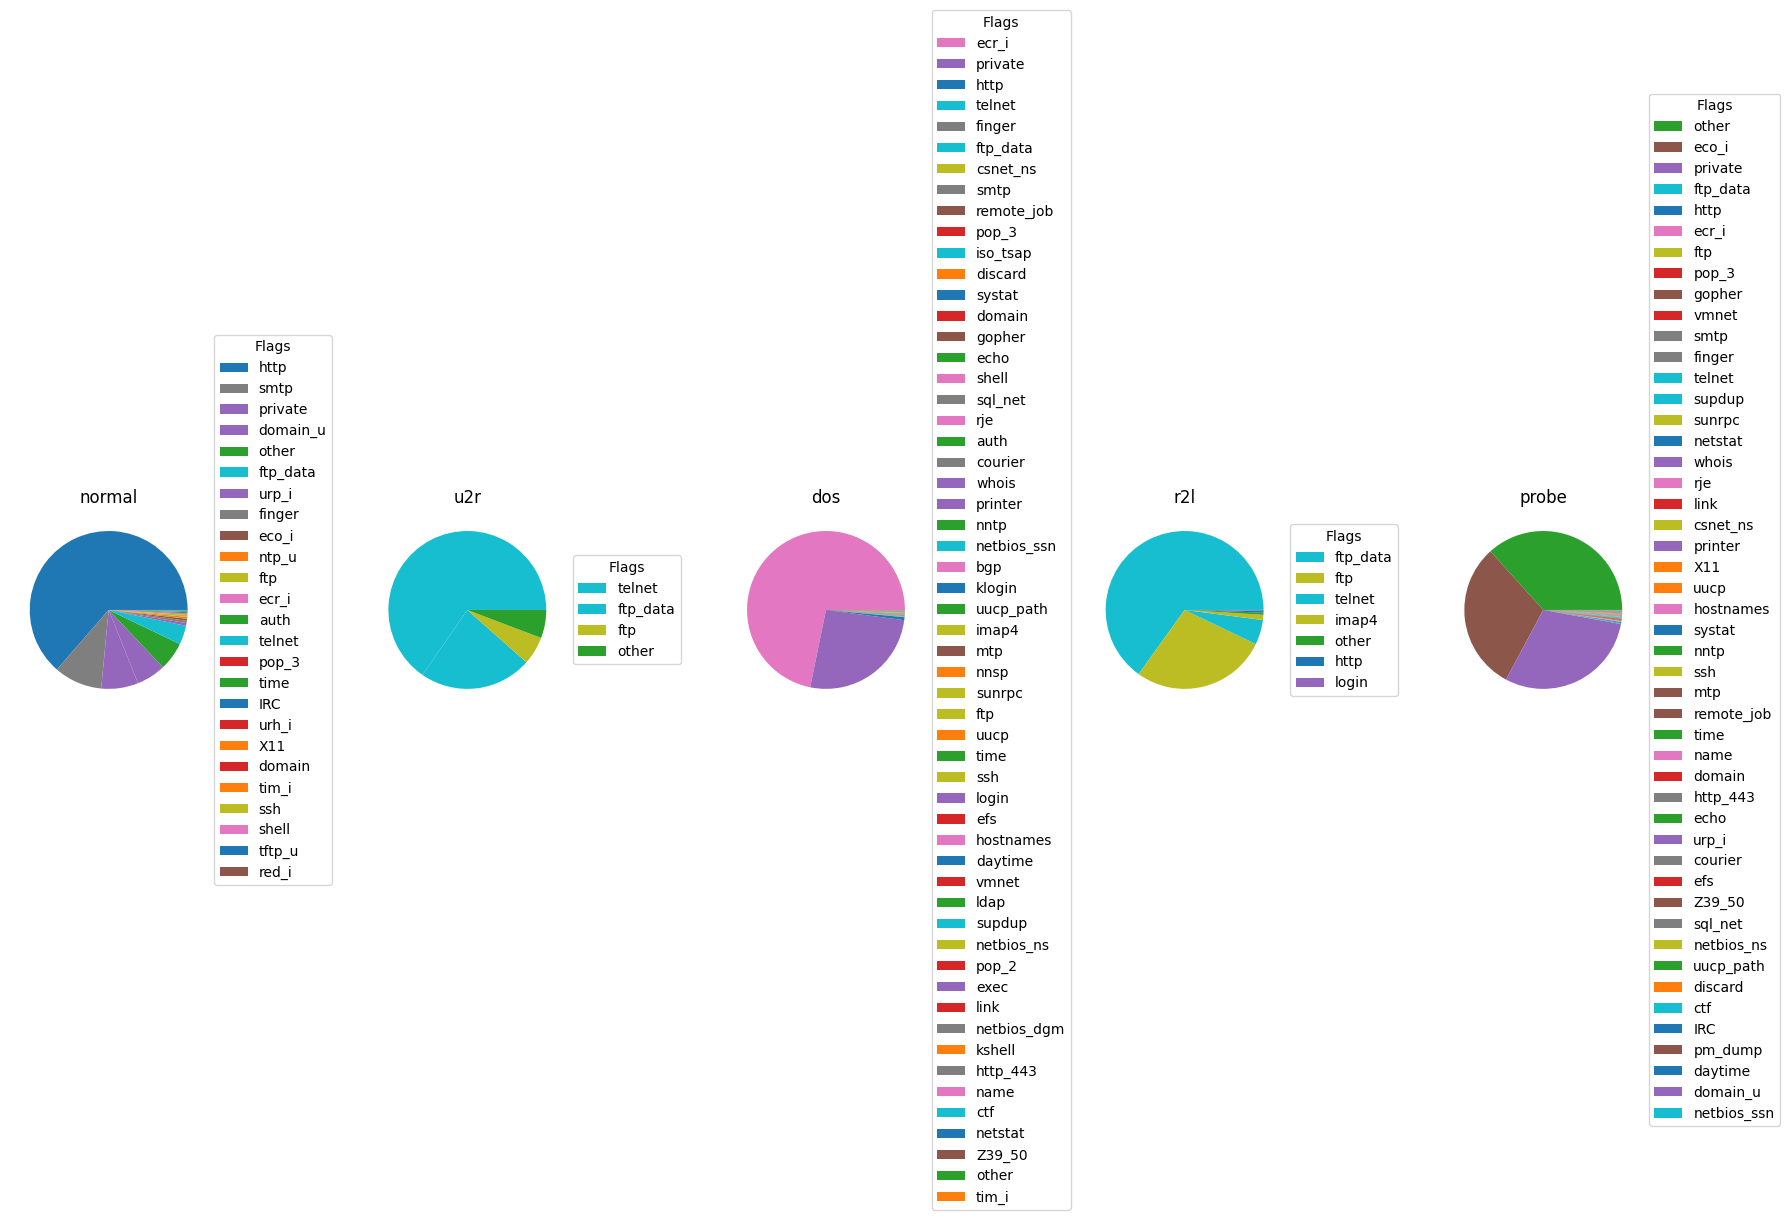

In [17]:
normal_services = df.loc[df.attack_type == 'normal'].service.value_counts()
u2r_services = df.loc[df.attack_type == 'u2r'].service.value_counts()
dos_services = df.loc[df.attack_type == 'dos'].service.value_counts()
r2l_services = df.loc[df.attack_type == 'r2l'].service.value_counts()
probe_services = df.loc[df.attack_type == 'probe'].service.value_counts()

# create the charts
service_axs = bake_pies([normal_services, u2r_services,dos_services,r2l_services , probe_services], ['normal','u2r','dos','r2l','probe'])       
plt.show()

<Figure size 640x480 with 0 Axes>

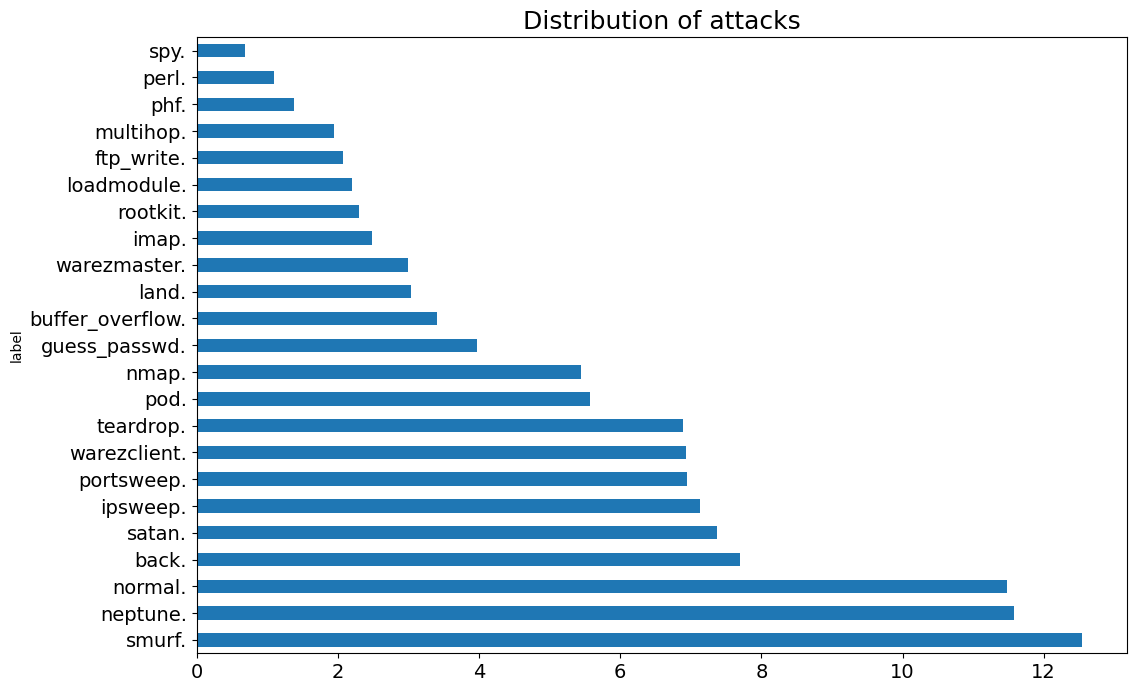

In [18]:
plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
plt.rcParams.update(params)
plt.title('Distribution of attacks')
#df.plot(kind='barh')
df['label'].value_counts().apply(np.log).plot(kind='barh')

plt.show()

<Figure size 640x480 with 0 Axes>

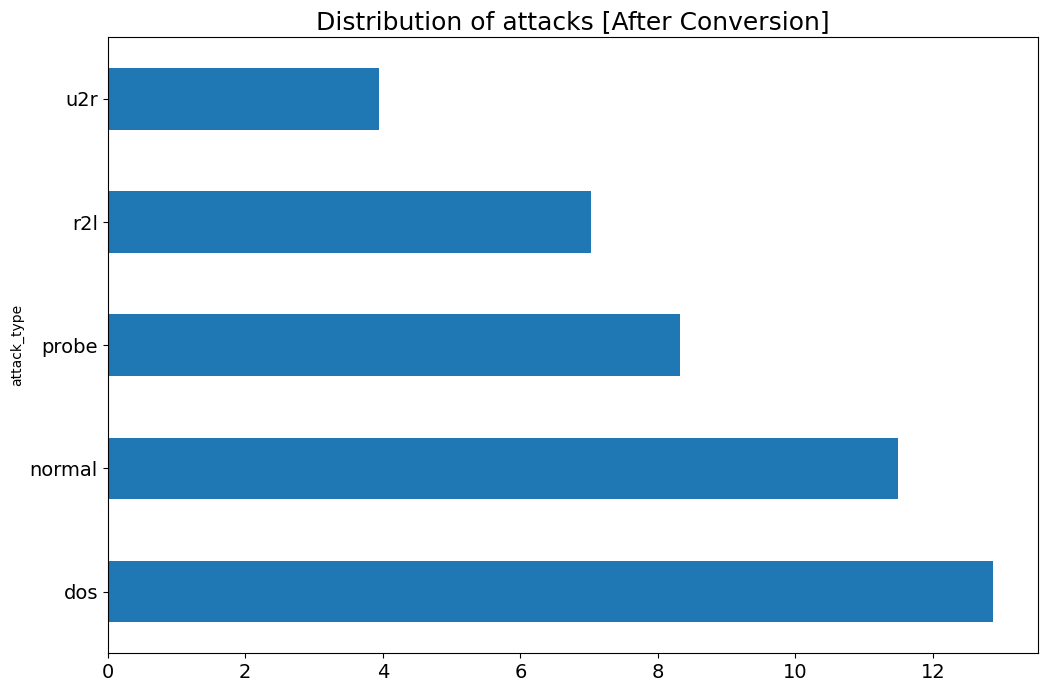

In [19]:
plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
plt.rcParams.update(params)
plt.title('Distribution of attacks [After Conversion]')
df['attack_type'].value_counts().apply(np.log).plot(kind='barh')

plt.show()

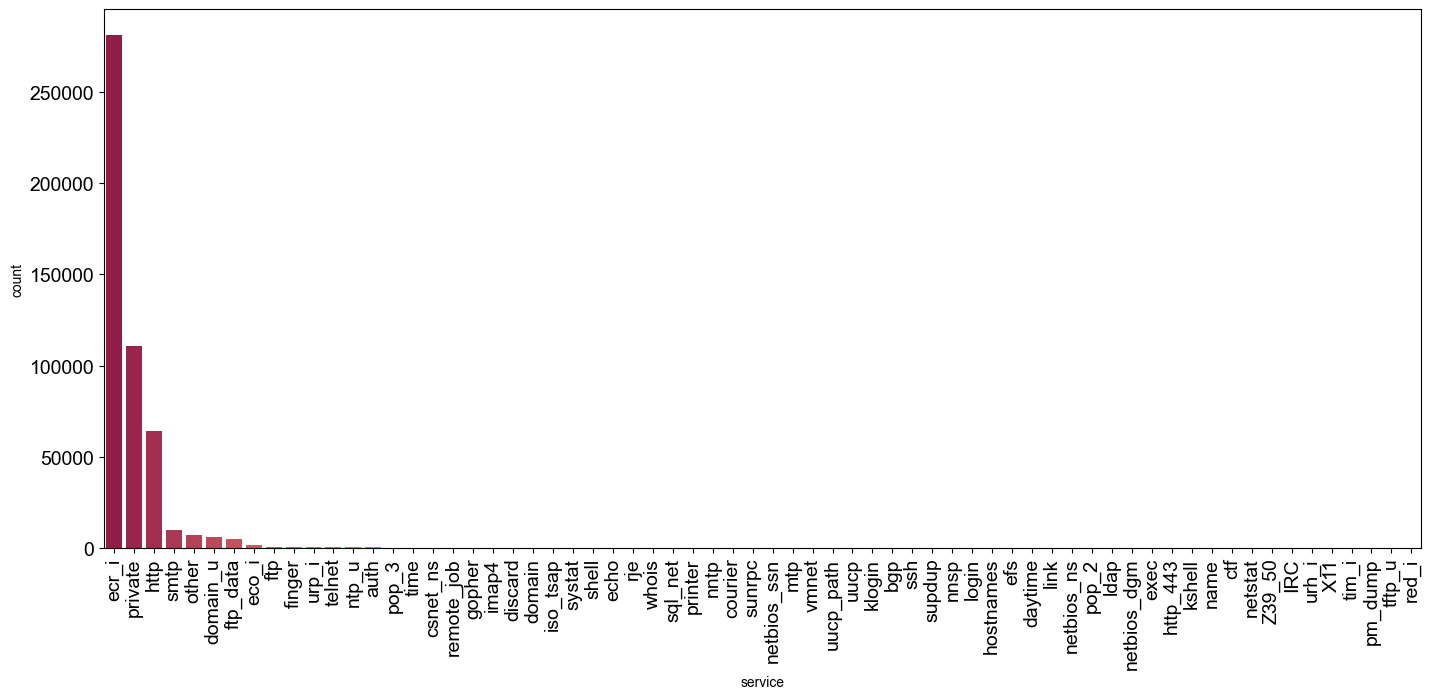

In [20]:
fig, ax = plt.subplots(figsize=(17, 7))
sns.countplot(x='service', data=df, ax=ax, palette='Spectral', order=df['service'].value_counts().index,linewidth=0)
sns.set_style("dark")
plt.xticks(rotation=90)
plt.show()

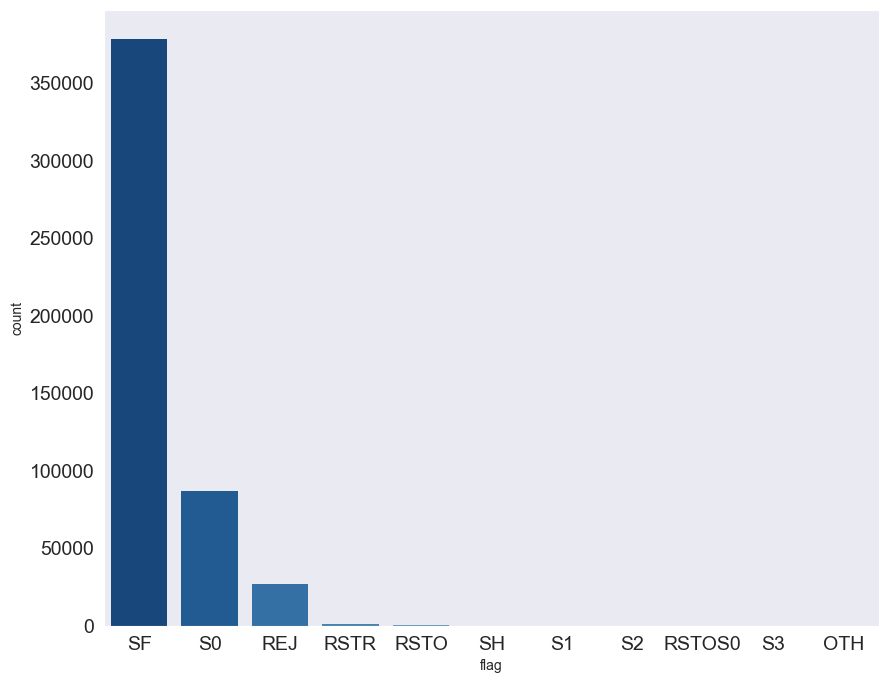

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='flag', data=df, ax=ax, palette='Blues_r', order=df['flag'].value_counts().index,linewidth=0)
plt.show()

In [22]:
#Categorical Data
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [23]:
df.drop_duplicates(subset=None, keep='first', inplace=True)
df.shape

(145586, 41)

In [24]:
df1 = df.drop(['label','attack_type'],axis=1)

In [25]:
df1.skew()

duration                        15.617861
protocol_type                    1.604591
service                          0.097470
flag                            -0.987933
src_bytes                      379.579057
dst_bytes                       74.338623
land                            85.302111
wrong_fragment                  12.157306
urgent                         243.006750
hot                             18.076224
num_failed_logins               87.285656
logged_in                        0.034047
num_compromised                226.920175
root_shell                      51.420551
su_attempted                   125.381941
num_root                       226.413492
num_file_creations             104.414950
num_shells                      59.086000
num_access_files                33.260757
is_guest_login                  14.475612
count                            1.315566
srv_count                       10.868871
serror_rate                      0.921102
srv_serror_rate                  0

In [26]:
df1.kurtosis()

duration                          337.489456
protocol_type                       6.201172
service                            -1.488923
flag                               -0.267023
src_bytes                      144575.696198
dst_bytes                        6002.899491
land                             7274.550013
wrong_fragment                    147.522601
urgent                          64055.310180
hot                               339.832115
num_failed_logins               10967.792131
logged_in                          -1.998868
num_compromised                 55522.552962
root_shell                       2642.109341
su_attempted                    16495.441298
num_root                        55678.882842
num_file_creations              12843.856748
num_shells                       3877.698966
num_access_files                 2239.060765
is_guest_login                    207.546203
count                               1.099390
srv_count                         147.595656
serror_rat

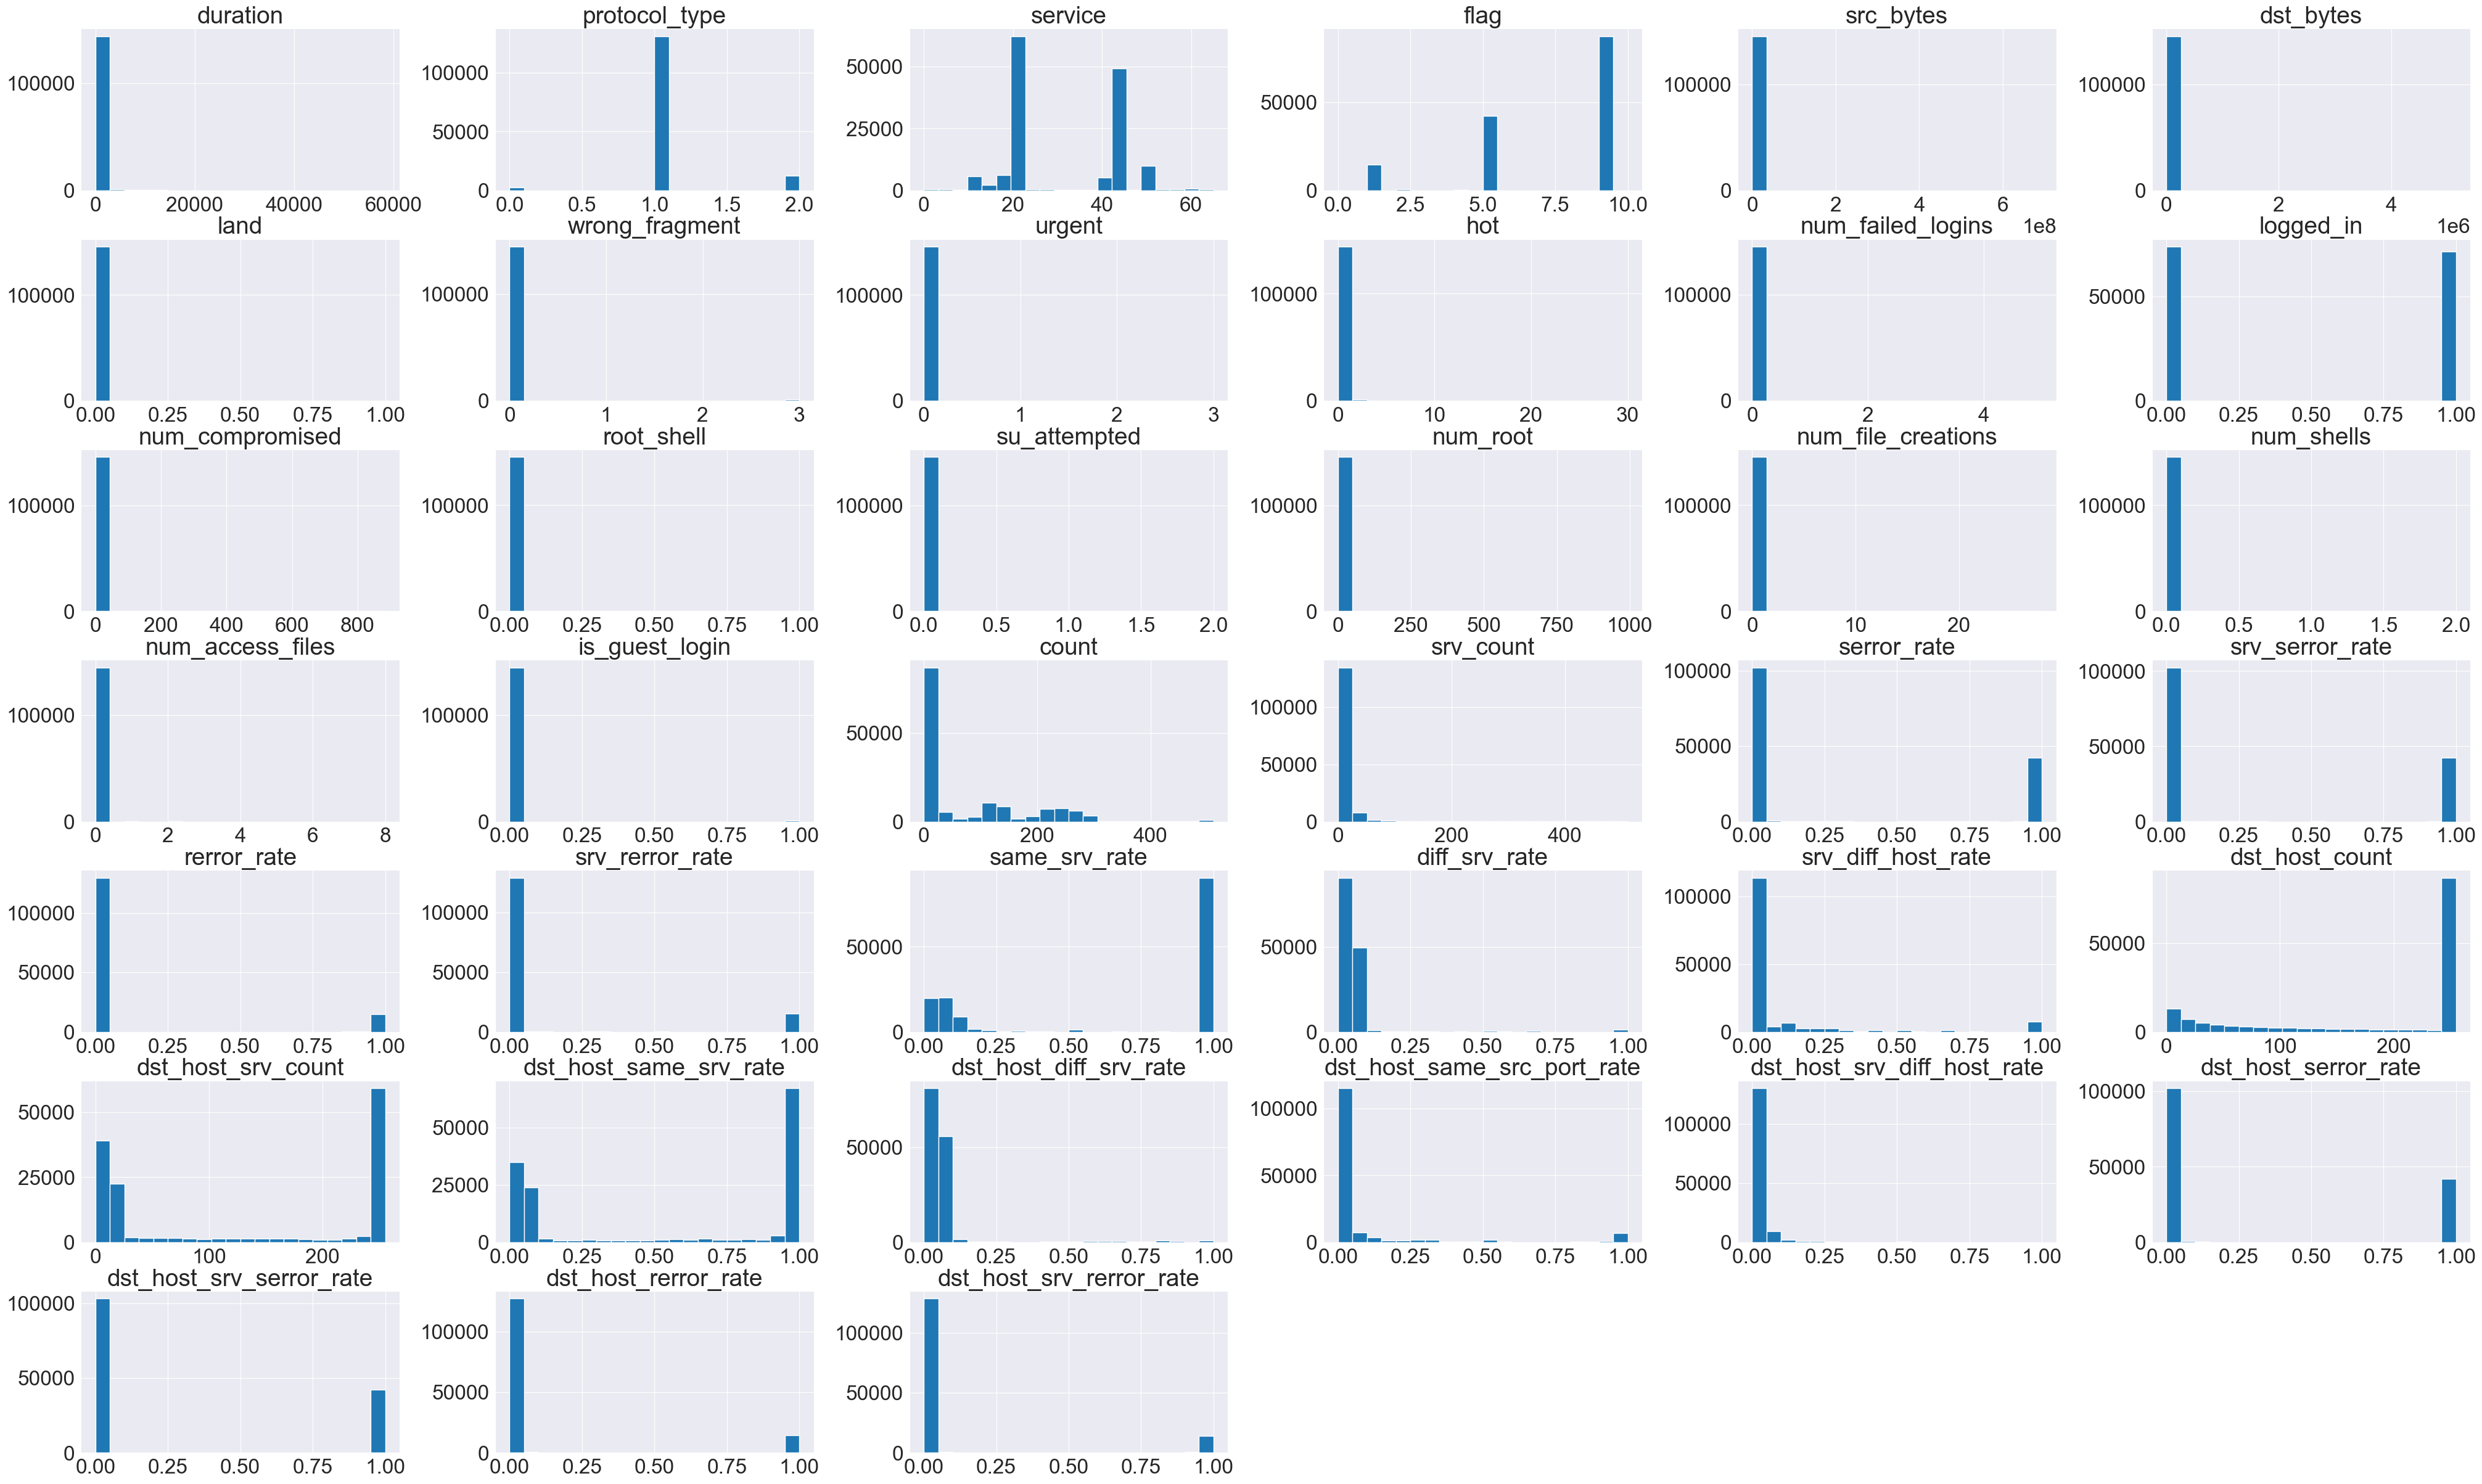

In [27]:
params = {'axes.titlesize':'28',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
plt.rcParams.update(params)
df.hist(figsize=(50, 30), bins=20)
plt.show()

In [28]:
df.shape

(145586, 41)

(145586, 41)


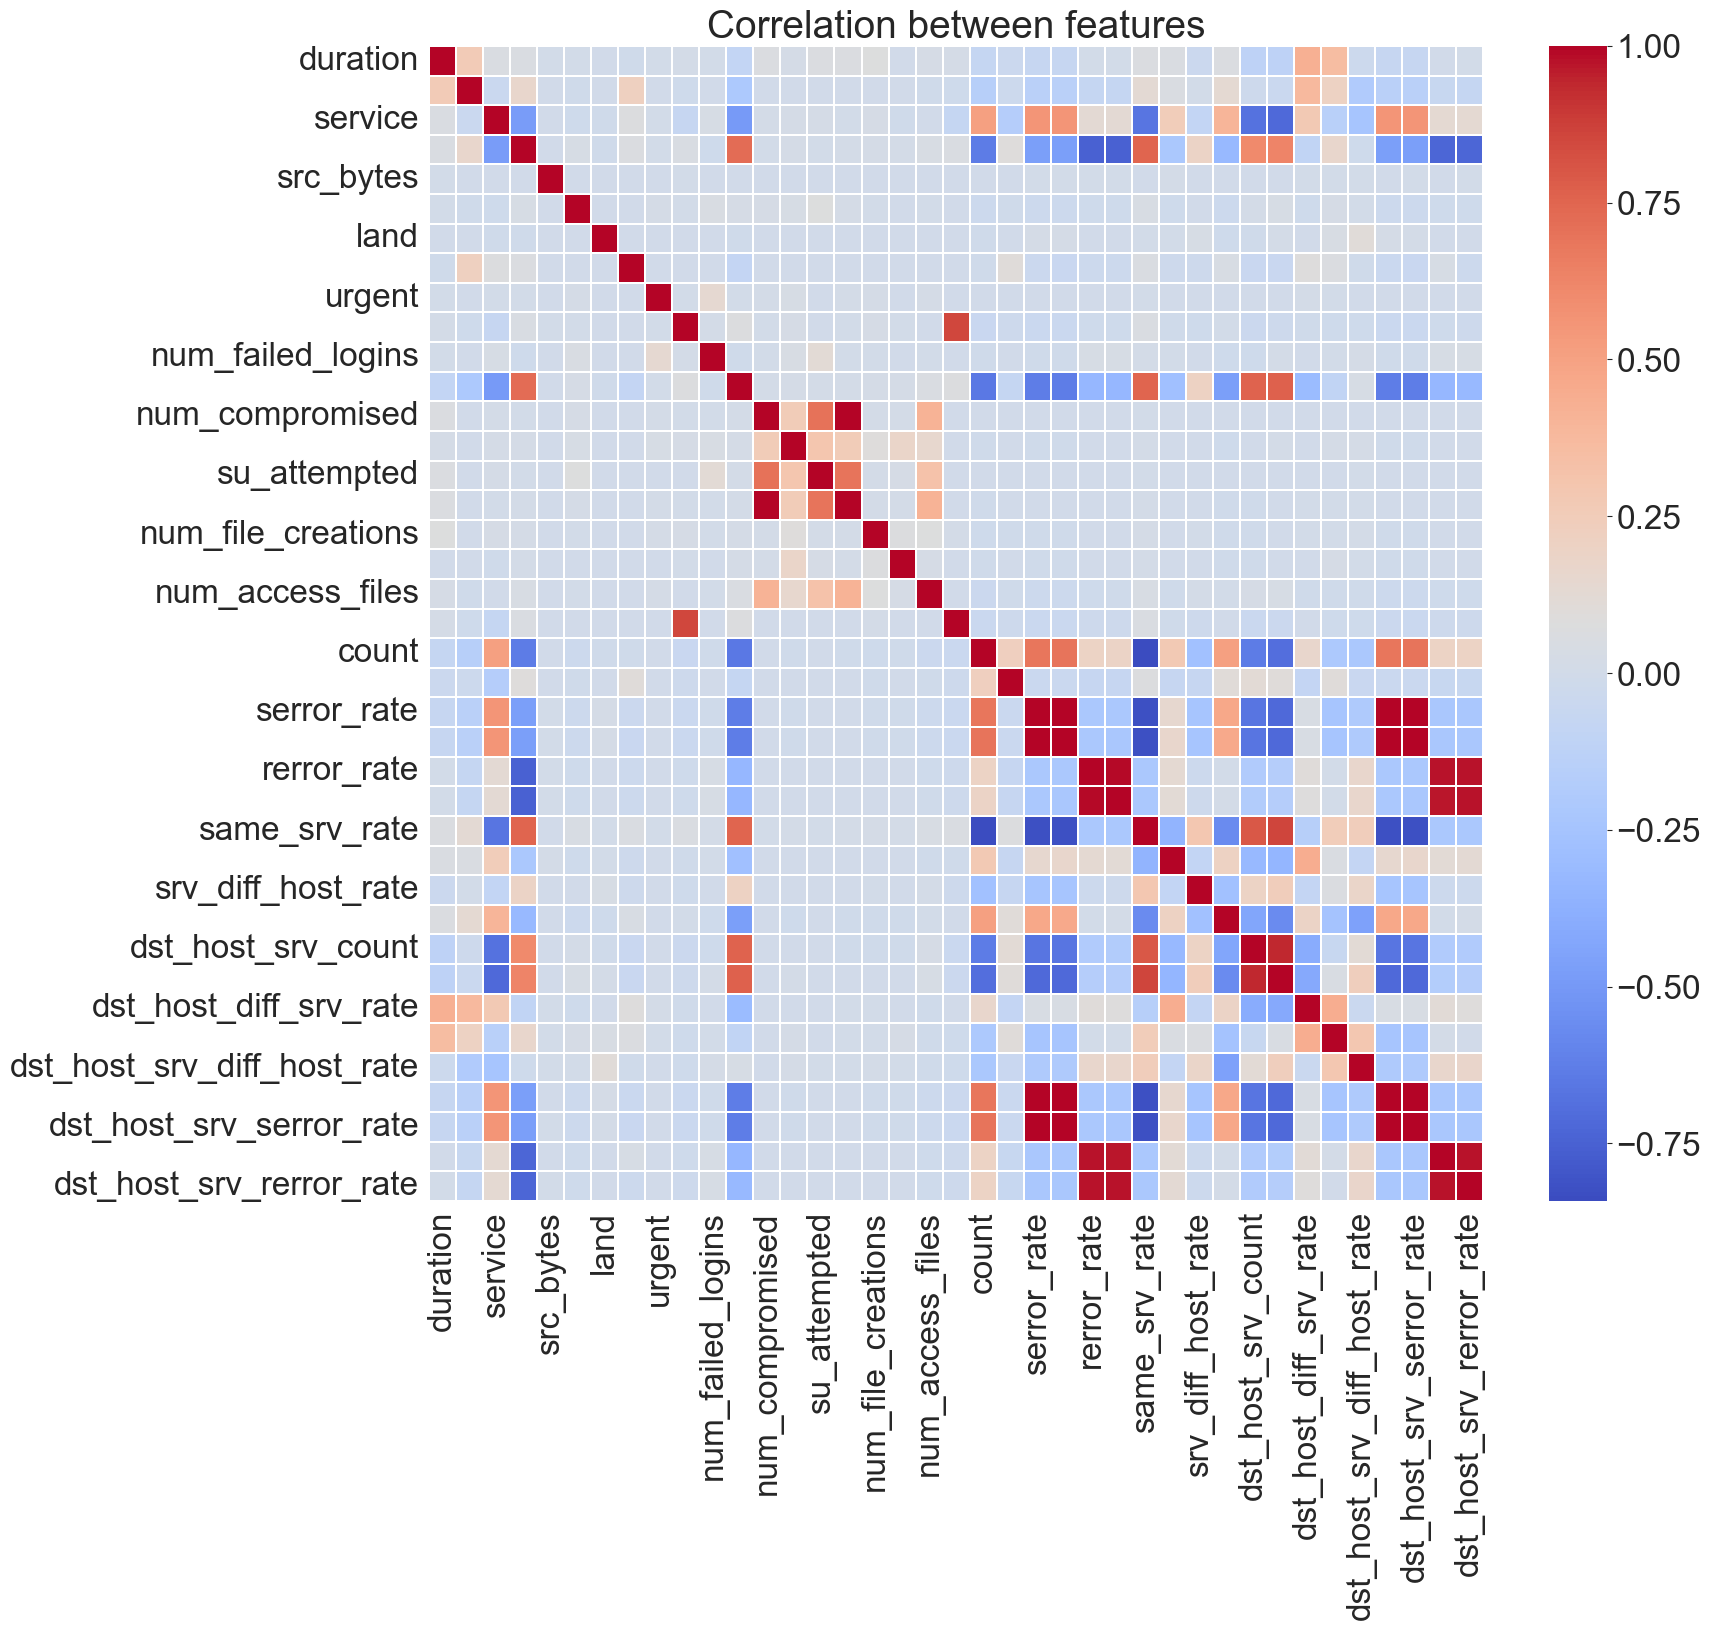

In [29]:
corr = df.corr(numeric_only = True)
print(df.shape)
fig, ax = plt.subplots(figsize=(17, 15))
sns.heatmap(corr, cmap='coolwarm', ax=ax, linewidths=0.1)
plt.title("Correlation between features")
plt.show()

In [30]:
high_corr = corr[abs(corr) > 0.8] # type: ignore
high_corr_pairs = high_corr.unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()
high_corr_pairs

duration                  duration                    1.000000
dst_host_srv_serror_rate  srv_serror_rate             0.998351
dst_host_serror_rate      serror_rate                 0.996843
serror_rate               srv_serror_rate             0.996363
dst_host_serror_rate      dst_host_srv_serror_rate    0.995898
dst_host_srv_serror_rate  serror_rate                 0.995152
srv_serror_rate           dst_host_serror_rate        0.995122
num_compromised           num_root                    0.994215
srv_rerror_rate           rerror_rate                 0.991317
dst_host_rerror_rate      rerror_rate                 0.975514
srv_rerror_rate           dst_host_srv_rerror_rate    0.975105
rerror_rate               dst_host_srv_rerror_rate    0.972614
dst_host_srv_rerror_rate  dst_host_rerror_rate        0.971501
dst_host_rerror_rate      srv_rerror_rate             0.967375
dst_host_same_srv_rate    dst_host_srv_count          0.936519
                          same_srv_rate               0

In [31]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_type
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,normal
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,22,9,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,1,22,9,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494018,0,1,22,9,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494019,0,1,22,9,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal


In [32]:
Le = LabelEncoder()
df['attack_type'] = Le.fit_transform(df['attack_type'])

In [33]:
df = df.drop(['label'],axis=1)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,1
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,1
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,1
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,1
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,22,9,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,1
494017,0,1,22,9,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,1
494018,0,1,22,9,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,1
494019,0,1,22,9,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,1


In [34]:
X = df.drop(['attack_type'],axis=1)
y = df['attack_type']

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)

principal_components = pca.fit_transform(X_normalized)

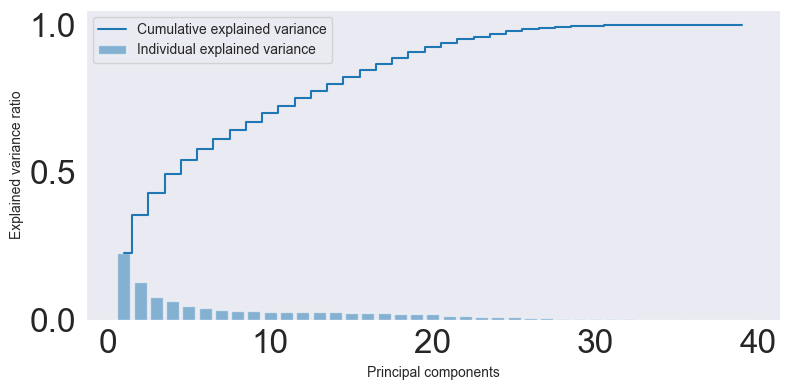

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=None)
pca.fit(X_normalized)


explained_var_cumulative = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), explained_var_cumulative, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X_normalized,y,test_size=0.3,random_state= 1)

In [39]:
pca = PCA(random_state=1, n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [40]:
X_train_pca.shape

(101910, 20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

binary_model = RandomForestClassifier()
binary_model.fit(X_train,y_train)
binary_predictions = binary_model.predict(X_test)


base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score

In [49]:
from sklearn.ensemble import RandomForestClassifier

binary_model = RandomForestClassifier()
binary_model.fit(X_train_pca,y_train)
binary_predictions = binary_model.predict(X_test_pca)


base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score

0.998191226302775

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_pca,y_train)
knn_predictions = knn_model.predict(X_test_pca)


base_knn_score = accuracy_score(knn_predictions,y_test)
base_knn_score

0.9977562047806575

In [42]:
lcount = df['attack_type'].value_counts()
lcount

attack_type
1    87832
0    54572
2     2131
3      999
4       52
Name: count, dtype: int64

In [43]:
df.reset_index(inplace=True)

In [44]:
df= df.drop(['index'],axis=1)

In [45]:
df_scaled = pd.DataFrame(X_normalized,columns=df.columns[:-1])
df_scaled['attack_type'] = df['attack_type']

In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models

2023-12-02 18:27:17.948165: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [47]:
from tqdm import tqdm
tf.keras.utils.disable_interactive_logging()

In [48]:
latent_dim = 100
input_shape = (39,1)
output_dim = 39

def build_generator(latent_dim, output_dim):
    model =  models.Sequential()
    model.add(layers.Dense(16, use_bias=False, input_shape=(latent_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(16))
    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())    
    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(output_dim))
    return model 

def build_discriminator(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(32, use_bias=False,input_shape=input_shape))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1))
    return model

generator=build_generator(latent_dim, output_dim)
discriminator=build_discriminator(input_shape)
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)
# def build_gan(generator, discriminator):
#     model = models.Sequential()
#     model.add(generator)
#     model.add(discriminator)
#     model.compile(loss='binary_crossentropy', optimizer='adam')
#     return model

def generate_and_print_data(generator, latent_dim, num_samples=10):
    noise = np.random.rand(num_samples, latent_dim)
    generated_data = generator.predict(noise)
    print("Generated Data:")
    print(generated_data)


def check_generated_data(generator, real_data, num_samples=1000, epsilon=0.1):
    generated_data = generator.predict(np.random.rand(num_samples, latent_dim))
    
    mean_abs_diff = np.mean(np.abs(real_data.mean(axis=0) - generated_data.mean(axis=0)))
    #print(f"Mean Absolute Difference: {mean_abs_diff}")
    if mean_abs_diff < epsilon:
        print("----------------------------------------Generated data is similar to real data.---------------------")
    else:
        print("----------------------------------------Generated data is different from real data.------------------")
        



# def train_gan(generator, discriminator, gan, real_data, epochs=5000, batch_size=16):

#     real_labels = np.ones((batch_size, 1))
#     fake_labels = np.zeros((batch_size, 1))

#     for epoch in tqdm(range(epochs)):
#         idx = np.random.randint(0, real_data.shape[0], batch_size)
#         real_samples = real_data[idx]
#         noise = np.random.rand(batch_size, latent_dim)
#         generated_samples = generator.predict(noise)

#         d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
#         d_loss_fake = discriminator.train_on_batch(generated_samples, fake_labels)

#         d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

#         # Train Generator via GAN
#         noise = np.random.rand(batch_size, latent_dim)
#         valid_labels = np.ones((batch_size, 1))
#         g_loss = gan.train_on_batch(noise, valid_labels)

#         # Print progress
#         if epoch % 100 == 0:
#             print(f"Epoch {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")
#             #generate_and_print_data(generator, latent_dim)
#             check_generated_data(generator, real_data, num_samples=1000, epsilon=0.1)

#     # Generate and print synthetic data after training
#     generate_and_print_data(generator, latent_dim)
#     check_generated_data(generator, real_data, num_samples=1000, epsilon=0.1)


In [49]:
EPOCHS = 1000
noise_dim = 100
#num_examples_to_generate = 16
BATCH_SIZE = 16

In [50]:
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    images=tf.reshape(images,(1,39))
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
     
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return (gen_loss,disc_loss)

In [51]:
import time

In [52]:
history=dict()
history['gen']=[]
history['dis']=[]
def train(dataset, epochs):
    for epoch in tqdm(range(epochs)):
        start = time.time()
        for batch in dataset:
           gen_loss,dis_loss= train_step(batch)
        if epoch % 100 == 0:
            check_generated_data(generator,dataset, num_samples=1000, epsilon=0.1)
        history['gen'].append(gen_loss)
        history['dis'].append(dis_loss)
        print ('Time for epoch {} is {} sec '.format(epoch + 1, time.time()-start))

In [ ]:
train(df_scaled[df['attack_type']==2].drop(['attack_type'],axis=1).to_numpy(),1000)

In [183]:
np.random.seed(42)
tf.random.set_seed(42)


real_data = (df_scaled[df_scaled['attack_type']==2].drop(['attack_type'],axis=1)).to_numpy()


latent_dim = 100  
input_shape = (39,1)
output_dim = 39


generator = build_generator(latent_dim, output_dim)
discriminator = build_discriminator(input_shape)
gan = build_gan(generator, discriminator)


train_gan(generator, discriminator, gan, real_data)

  0%|          | 1/5000 [00:07<10:40:22,  7.69s/it]

Epoch 0, D Loss: 6.76407778263092, G Loss: 9.018798828125
----------------------------------------Generated data is different from real data.------------------


  2%|▏         | 101/5000 [00:24<16:58,  4.81it/s] 

Epoch 100, D Loss: 0.8614762425422668, G Loss: 0.6894098520278931
----------------------------------------Generated data is different from real data.------------------


  4%|▍         | 201/5000 [00:41<16:36,  4.82it/s]

Epoch 200, D Loss: 0.7036774158477783, G Loss: 0.5731226801872253
----------------------------------------Generated data is different from real data.------------------


  6%|▌         | 301/5000 [00:58<16:49,  4.66it/s]

Epoch 300, D Loss: 0.6981679201126099, G Loss: 0.5977652072906494
----------------------------------------Generated data is different from real data.------------------


  8%|▊         | 401/5000 [01:15<16:55,  4.53it/s]

Epoch 400, D Loss: 0.699360728263855, G Loss: 0.586662769317627
----------------------------------------Generated data is different from real data.------------------


 10%|█         | 501/5000 [01:32<17:38,  4.25it/s]

Epoch 500, D Loss: 0.7004033625125885, G Loss: 0.5782963633537292
----------------------------------------Generated data is different from real data.------------------


 12%|█▏        | 601/5000 [01:49<15:08,  4.84it/s]

Epoch 600, D Loss: 0.7012337446212769, G Loss: 0.5725092887878418
----------------------------------------Generated data is different from real data.------------------


 14%|█▍        | 701/5000 [02:09<17:00,  4.21it/s]

Epoch 700, D Loss: 0.7017256021499634, G Loss: 0.5695946216583252
----------------------------------------Generated data is different from real data.------------------


 16%|█▌        | 801/5000 [02:27<16:05,  4.35it/s]

Epoch 800, D Loss: 0.7017949223518372, G Loss: 0.5690876245498657
----------------------------------------Generated data is different from real data.------------------


 18%|█▊        | 901/5000 [02:45<14:40,  4.65it/s]

Epoch 900, D Loss: 0.7012441754341125, G Loss: 0.5726706981658936
----------------------------------------Generated data is different from real data.------------------


 20%|██        | 1001/5000 [03:04<14:06,  4.72it/s]

Epoch 1000, D Loss: 0.7001102566719055, G Loss: 0.5806469321250916
----------------------------------------Generated data is different from real data.------------------


 22%|██▏       | 1101/5000 [03:21<14:50,  4.38it/s]

Epoch 1100, D Loss: 0.6979739367961884, G Loss: 0.5985565781593323
----------------------------------------Generated data is different from real data.------------------


 24%|██▍       | 1201/5000 [03:38<13:23,  4.73it/s]

Epoch 1200, D Loss: 0.6964712738990784, G Loss: 0.6140992045402527
----------------------------------------Generated data is different from real data.------------------


 26%|██▌       | 1301/5000 [03:55<12:34,  4.90it/s]

Epoch 1300, D Loss: 0.6954748034477234, G Loss: 0.6270912289619446
----------------------------------------Generated data is different from real data.------------------


 28%|██▊       | 1401/5000 [04:12<12:19,  4.87it/s]

Epoch 1400, D Loss: 0.695073664188385, G Loss: 0.6340701580047607
----------------------------------------Generated data is different from real data.------------------


 30%|███       | 1500/5000 [04:31<09:37,  6.06it/s]

Epoch 1500, D Loss: 0.6950618326663971, G Loss: 0.6341580748558044


 30%|███       | 1501/5000 [04:31<13:40,  4.27it/s]

----------------------------------------Generated data is different from real data.------------------


 32%|███▏      | 1600/5000 [04:48<09:05,  6.23it/s]

Epoch 1600, D Loss: 0.6952197253704071, G Loss: 0.6312326192855835


 32%|███▏      | 1601/5000 [04:48<13:06,  4.32it/s]

----------------------------------------Generated data is different from real data.------------------


 34%|███▍      | 1701/5000 [05:06<12:38,  4.35it/s]

Epoch 1700, D Loss: 0.6957174837589264, G Loss: 0.6231297254562378
----------------------------------------Generated data is different from real data.------------------


 36%|███▌      | 1801/5000 [05:24<11:29,  4.64it/s]

Epoch 1800, D Loss: 0.696941465139389, G Loss: 0.6076239943504333
----------------------------------------Generated data is different from real data.------------------


 38%|███▊      | 1901/5000 [05:41<10:41,  4.83it/s]

Epoch 1900, D Loss: 0.6990326941013336, G Loss: 0.5873464345932007
----------------------------------------Generated data is different from real data.------------------


 40%|████      | 2001/5000 [05:58<10:27,  4.78it/s]

Epoch 2000, D Loss: 0.7022567987442017, G Loss: 0.5637868642807007
----------------------------------------Generated data is different from real data.------------------


 42%|████▏     | 2101/5000 [06:15<10:15,  4.71it/s]

Epoch 2100, D Loss: 0.7048895061016083, G Loss: 0.5482029914855957
----------------------------------------Generated data is different from real data.------------------


 44%|████▍     | 2201/5000 [06:32<11:14,  4.15it/s]

Epoch 2200, D Loss: 0.708008885383606, G Loss: 0.5325859785079956
----------------------------------------Generated data is different from real data.------------------


 46%|████▌     | 2300/5000 [06:49<09:02,  4.98it/s]

Epoch 2300, D Loss: 0.7124819159507751, G Loss: 0.5137665867805481


 46%|████▌     | 2301/5000 [06:50<12:10,  3.70it/s]

----------------------------------------Generated data is different from real data.------------------


 48%|████▊     | 2401/5000 [07:08<08:35,  5.04it/s]

Epoch 2400, D Loss: 0.7181074023246765, G Loss: 0.49394670128822327
----------------------------------------Generated data is different from real data.------------------


 50%|█████     | 2500/5000 [07:25<06:39,  6.25it/s]

Epoch 2500, D Loss: 0.930730551481247, G Loss: 0.4236164689064026


 50%|█████     | 2502/5000 [07:25<09:06,  4.57it/s]

----------------------------------------Generated data is different from real data.------------------


 52%|█████▏    | 2601/5000 [07:42<08:16,  4.84it/s]

Epoch 2600, D Loss: 0.7000642716884613, G Loss: 0.581688642501831
----------------------------------------Generated data is different from real data.------------------


 54%|█████▍    | 2701/5000 [07:59<07:53,  4.86it/s]

Epoch 2700, D Loss: 0.713624432682991, G Loss: 0.5087960362434387
----------------------------------------Generated data is different from real data.------------------


 56%|█████▌    | 2801/5000 [08:15<07:50,  4.67it/s]

Epoch 2800, D Loss: 0.7196747064590454, G Loss: 0.48825132846832275
----------------------------------------Generated data is different from real data.------------------


 58%|█████▊    | 2901/5000 [08:32<06:59,  5.00it/s]

Epoch 2900, D Loss: 0.72586989402771, G Loss: 0.4704095125198364
----------------------------------------Generated data is different from real data.------------------


 60%|██████    | 3001/5000 [08:49<06:34,  5.06it/s]

Epoch 3000, D Loss: 0.7320484966039658, G Loss: 0.45458459854125977
----------------------------------------Generated data is different from real data.------------------


 62%|██████▏   | 3101/5000 [09:09<12:05,  2.62it/s]

Epoch 3100, D Loss: 0.7384736984968185, G Loss: 0.4399627149105072
----------------------------------------Generated data is different from real data.------------------


 64%|██████▍   | 3201/5000 [09:26<06:43,  4.46it/s]

Epoch 3200, D Loss: 0.7448186576366425, G Loss: 0.4276115298271179
----------------------------------------Generated data is different from real data.------------------


 66%|██████▌   | 3301/5000 [09:44<05:53,  4.80it/s]

Epoch 3300, D Loss: 0.7550516724586487, G Loss: 0.4175427258014679
----------------------------------------Generated data is different from real data.------------------


 68%|██████▊   | 3401/5000 [10:02<05:44,  4.64it/s]

Epoch 3400, D Loss: 0.7706422060728073, G Loss: 0.3913766145706177
----------------------------------------Generated data is different from real data.------------------


 70%|███████   | 3501/5000 [10:19<05:21,  4.66it/s]

Epoch 3500, D Loss: 0.9431105405092239, G Loss: 0.32491642236709595
----------------------------------------Generated data is different from real data.------------------


 72%|███████▏  | 3601/5000 [10:36<04:46,  4.88it/s]

Epoch 3600, D Loss: 0.9233097732067108, G Loss: 0.42903101444244385
----------------------------------------Generated data is different from real data.------------------


 74%|███████▍  | 3701/5000 [10:52<04:33,  4.75it/s]

Epoch 3700, D Loss: 0.7864758372306824, G Loss: 0.36849355697631836
----------------------------------------Generated data is different from real data.------------------


 76%|███████▌  | 3801/5000 [11:09<04:11,  4.77it/s]

Epoch 3800, D Loss: 0.7873065769672394, G Loss: 0.3688198924064636
----------------------------------------Generated data is different from real data.------------------


 78%|███████▊  | 3901/5000 [11:26<03:46,  4.85it/s]

Epoch 3900, D Loss: 0.7881023287773132, G Loss: 0.37018269300460815
----------------------------------------Generated data is different from real data.------------------


 80%|████████  | 4001/5000 [11:43<03:23,  4.91it/s]

Epoch 4000, D Loss: 0.7911383509635925, G Loss: 0.3666509985923767
----------------------------------------Generated data is different from real data.------------------


 82%|████████▏ | 4101/5000 [12:01<03:36,  4.16it/s]

Epoch 4100, D Loss: 0.8197232484817505, G Loss: 0.3478269577026367
----------------------------------------Generated data is different from real data.------------------


 84%|████████▍ | 4201/5000 [12:18<02:48,  4.73it/s]

Epoch 4200, D Loss: 0.8009248077869415, G Loss: 0.353498637676239
----------------------------------------Generated data is different from real data.------------------


 86%|████████▌ | 4301/5000 [12:36<02:36,  4.48it/s]

Epoch 4300, D Loss: 0.8053030073642731, G Loss: 0.35027071833610535
----------------------------------------Generated data is different from real data.------------------


 88%|████████▊ | 4401/5000 [12:53<01:59,  5.03it/s]

Epoch 4400, D Loss: 0.8200468271970749, G Loss: 0.3463802933692932
----------------------------------------Generated data is different from real data.------------------


 90%|█████████ | 4501/5000 [13:09<01:45,  4.74it/s]

Epoch 4500, D Loss: 0.8114075362682343, G Loss: 0.3426492214202881
----------------------------------------Generated data is different from real data.------------------


 92%|█████████▏| 4601/5000 [13:26<01:25,  4.65it/s]

Epoch 4600, D Loss: 0.8140373826026917, G Loss: 0.3403087258338928
----------------------------------------Generated data is different from real data.------------------


 94%|█████████▍| 4701/5000 [13:43<01:04,  4.61it/s]

Epoch 4700, D Loss: 0.8193714469671249, G Loss: 0.3356372117996216
----------------------------------------Generated data is different from real data.------------------


 96%|█████████▌| 4801/5000 [14:03<00:44,  4.48it/s]

Epoch 4800, D Loss: 0.8171769678592682, G Loss: 0.3373526930809021
----------------------------------------Generated data is different from real data.------------------


 98%|█████████▊| 4901/5000 [14:21<00:19,  4.97it/s]

Epoch 4900, D Loss: 6.623684525489807, G Loss: 1.0582997798919678
----------------------------------------Generated data is different from real data.------------------


100%|██████████| 5000/5000 [14:37<00:00,  5.70it/s]


Generated Data:
[[ 0.9999965  -0.96611273 -0.99997973 -0.9844691   0.09399267 -0.9990553
  -1.         -1.         -0.99148184 -0.99999094  0.999281    0.84727556
  -0.9980961  -0.9902507  -0.33328307 -0.2369483  -0.9999951   0.6048102
  -0.9505577   0.67378616  0.15334302 -0.21641949 -0.08005293  0.9999751
  -1.         -0.78870183  0.95616275 -0.99969333 -0.9999996   0.975379
   0.9998199   0.53098375 -0.9980801   0.9999731   0.99185026  0.9997436
   0.99968547 -0.11269017 -0.9999876 ]
 [-0.4521409  -1.          1.         -1.          1.         -1.
  -1.          0.99998796 -1.         -1.          1.          1.
  -0.65847826  1.         -0.9380843   1.          1.          0.99895173
   1.          1.         -1.          0.999988   -0.66519916  1.
   1.         -0.9398358   1.          0.9999991   1.         -1.
  -0.97523445  1.         -0.98679596 -0.99999964 -1.         -1.
   1.         -1.         -1.        ]
 [ 0.9999932   1.         -1.          0.6367564   0.76213497  0

In [184]:
def check_generated_data(generator, real_data, num_samples=1000, epsilon=0.1):
    generated_data = generator.predict(np.random.rand(num_samples, latent_dim))
    
    mean_abs_diff = np.mean(np.abs(real_data.mean(axis=0) - generated_data.mean(axis=0)))
    print(f"Mean Absolute Difference: {mean_abs_diff}")
    if mean_abs_diff < epsilon:
        print("Generated data is similar to real data.")
    else:
        print("Generated data is different from real data.")
    return generated_data

In [185]:
generate_and_print_data(generator, latent_dim)
out = check_generated_data(generator, real_data, num_samples=10, epsilon=0.1)

Generated Data:
[[-0.9937373   0.999954   -0.5659629   0.9999724   1.         -0.99970937
   0.9999978  -1.         -0.24017076  1.         -1.         -0.9999997
  -0.53741413 -0.9999982   0.99999696 -0.9999995  -0.98683804  0.9999897
  -0.95999825 -0.98523265  1.          0.10744197 -0.9790367  -0.7251991
  -1.          0.9999988  -0.9990898  -1.         -1.          1.
   1.         -1.         -1.          0.99959445  0.9999905   1.
  -0.9999236   0.9999849   0.9998529 ]
 [-0.54992044 -0.99996614  0.9999474  -1.         -0.98750395 -0.8049011
  -0.99956954 -0.9981451  -0.9999954  -1.          0.9891878   0.9993653
  -0.9973932   0.9999987   0.3659141   0.9989256   0.99993676  0.773821
   0.99840915 -0.9951621  -0.9998281   0.9995636   0.49090457  1.
   0.8553903   0.9998506   1.          0.996225    0.9999762  -0.5080931
  -0.04903515  0.99989545 -0.9613949   0.58786464  0.9996669  -0.8895792
  -0.23395626 -1.         -0.9999997 ]
 [ 0.98476344 -0.99992764  0.9999604  -0.9968281  -

In [186]:
out.shape

(10, 39)

In [187]:
out = pca.transform(out)
out.shape

(10, 20)

In [188]:
knn_model.predict(out)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])